# Random Forest Regression
https://www.kaggle.com/mailology1/bike-sharing-random-forest-regression
https://towardsdatascience.com/improving-random-forest-in-python-part-1-893916666cd

Importing the libraries


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 200)

Creating a df with the disease rates for each city and their respective suicide rates

In [72]:
df1 = pd.read_csv('../../TabNet/complete_rates_2015.csv', index_col=[0])
df2 = pd.read_csv('../../TabNet/complete_rates_2016.csv', index_col=[0])
df3 = pd.read_csv('../../TabNet/complete_rates_2017.csv', index_col=[0])
frames = [df1, df2, df3]
df = pd.concat(frames)
df = df.drop('MUNCOD', 1)

## Strategy 1: don't remove anything

Selecting X (independent variables) and y (dependent variable).

In [61]:
X = df.iloc[:,0:14].values
y = df.iloc[:, -1].values

RMSE: 9.767825295936131

Accuracy: 0.43018490996286357

## Strategy 2: imput values

In [23]:
import numpy as np
from sklearn.impute import SimpleImputer
df.loc[:, df.columns != 'RATE'] = df.loc[:, df.columns != 'RATE'].replace(0, np.nan)

X = df.iloc[:, 0:14].values
y = df.iloc[:, -1].values
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X)
X = imputer.transform(X)

{'max_features': 'log2', 'n_estimators': 300}

RMSE: 9.453248697063861

Accuracy: 0.4555252020918406

## Strategy 3: remove rows + fill null

In [35]:
import numpy as np
N = 12
df.loc[:, df.columns != 'RATE'] = df.loc[:, df.columns != 'RATE'].replace(0, np.nan)
df = df.dropna(thresh=N) # At least N non null items
df = df.fillna(0)
X = df.iloc[:, 0:14].values
y = df.iloc[:, -1].values

{'max_features': 'log2', 'n_estimators': 300}

RMSE: 5.910890360138005

Accuracy: 0.20317934464122725

## Strategy 4: remove rows + imput values

In [73]:
import numpy as np
from sklearn.impute import SimpleImputer
N = 12
df.loc[:, df.columns != 'RATE'] = df.loc[:, df.columns != 'RATE'].replace(0, np.nan)
df = df.dropna(thresh=N) # At least N non null items

X = df.iloc[:, 0:14].values
y = df.iloc[:, -1].values

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X)
X = imputer.transform(X)

{'max_features': 'sqrt', 'n_estimators': 200}

RMSE: 5.923165150865993

Accuracy: 0.19423204398310187

## Continue

Splitting the dataset into the Training set and Test set

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Selecting best parameters

In [48]:
# Grid Search
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

regressor = RandomForestRegressor()
parameters = [{'n_estimators' : [150,200,250,300], 'max_features' : ['auto','sqrt','log2']}]
grid_search = GridSearchCV(estimator = regressor, param_grid = parameters)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [49]:
best_parameters

{'max_features': 'sqrt', 'n_estimators': 200}

Random Forest Regression model
Use the best parameters found from above to build the model

In [75]:
regressor = RandomForestRegressor(n_estimators = 200, max_features = 'sqrt') 
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Predicting the values 

In [76]:
y_pred = regressor.predict(X_test) 

Comparing predicted values with true values in testing set

In [77]:
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(y_test, y_pred))

5.935928279196662

In [78]:
regressor.score(X_test, y_test)

0.24587410626598624

In [79]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv =10)
accuracy.mean()

0.19374755791178383

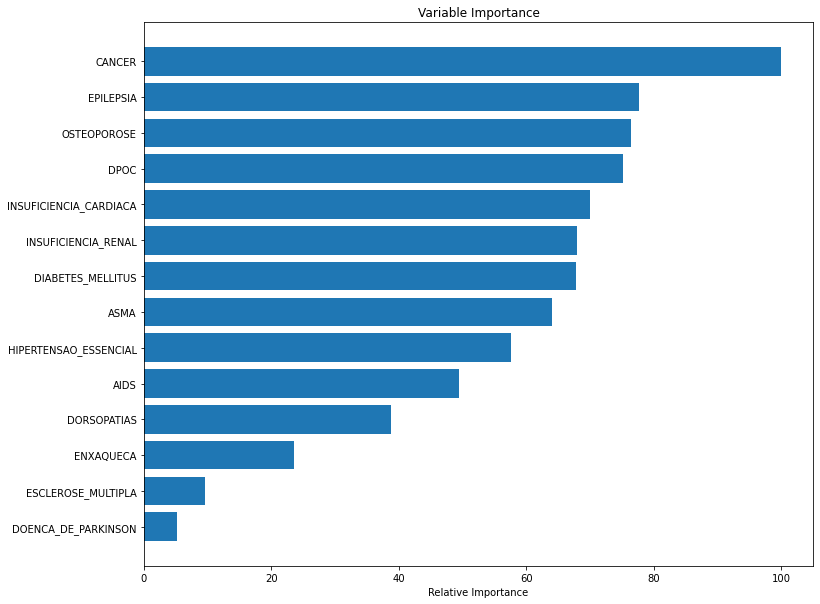

In [68]:
feature_importance = regressor.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [69]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(df.columns), importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: CANCER               Importance: 0.13
Variable: OSTEOPOROSE          Importance: 0.1
Variable: EPILEPSIA            Importance: 0.1
Variable: DPOC                 Importance: 0.1
Variable: INSUFICIENCIA_RENAL  Importance: 0.09
Variable: INSUFICIENCIA_CARDIACA Importance: 0.09
Variable: DIABETES_MELLITUS    Importance: 0.09
Variable: ASMA                 Importance: 0.08
Variable: HIPERTENSAO_ESSENCIAL Importance: 0.07
Variable: AIDS                 Importance: 0.06
Variable: DORSOPATIAS          Importance: 0.05
Variable: ENXAQUECA            Importance: 0.03
Variable: ESCLEROSE_MULTIPLA   Importance: 0.01
Variable: DOENCA_DE_PARKINSON  Importance: 0.01


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0, 0.5, 'Predicted')

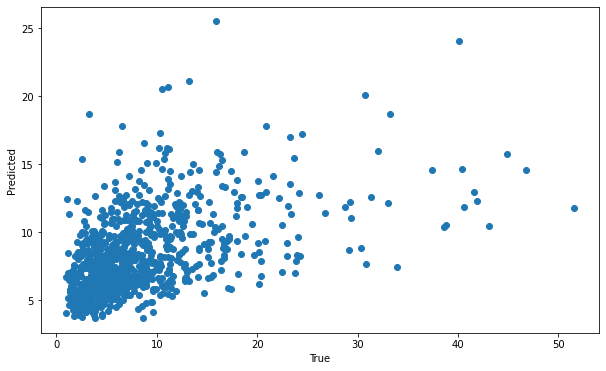

In [80]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel('True')
plt.ylabel('Predicted')